# Load DF

Model 1: Predicting Price
MSE: 13.8455023988425
R2 Score: 0.20622111598088422
Model 2: Predicting Rating
MSE: 5889.3030815150105
R2 Score: -0.01878652244429868
Model 1 Cross-Validation MSE: 14.677723673292792
Model 2 Cross-Validation MSE: 5990.109176475482


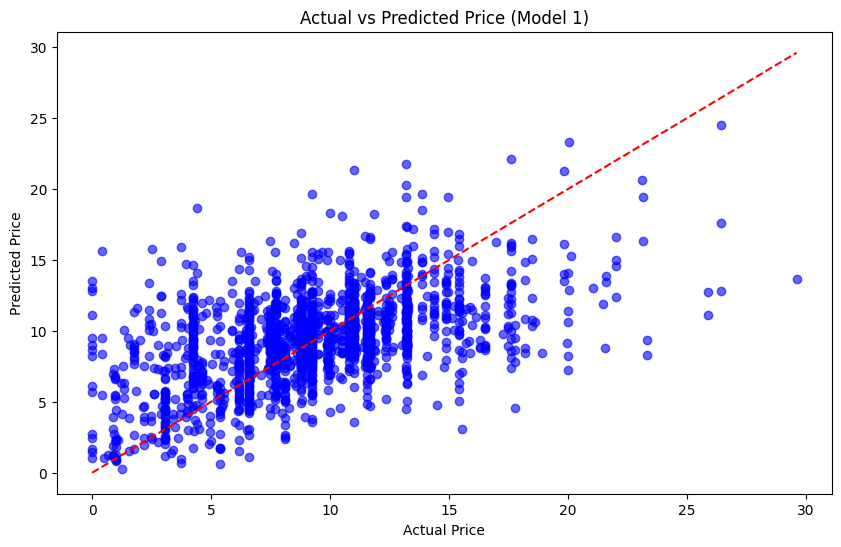

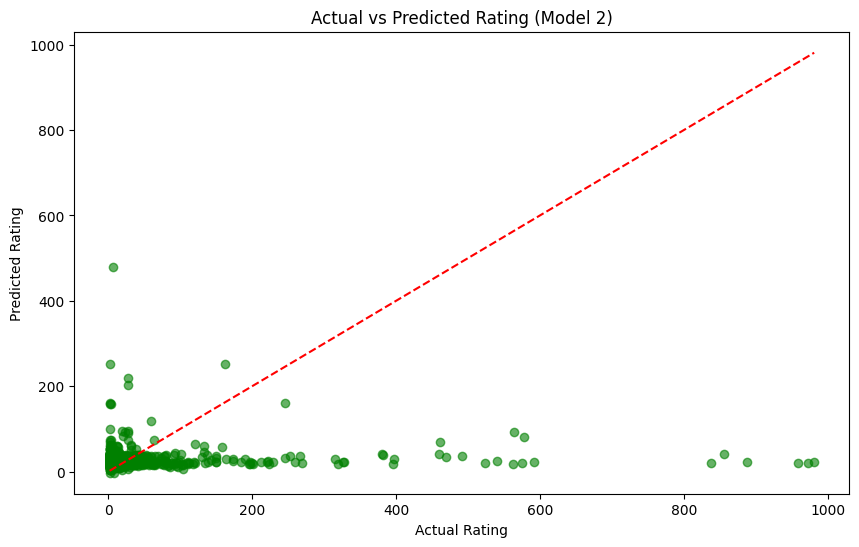

/var/folders/09/_ffptp312fj33qw8f8_zqqgc0000gn/T/ipykernel_26876/3238631432.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X1.columns, y=importance1, palette='coolwarm')


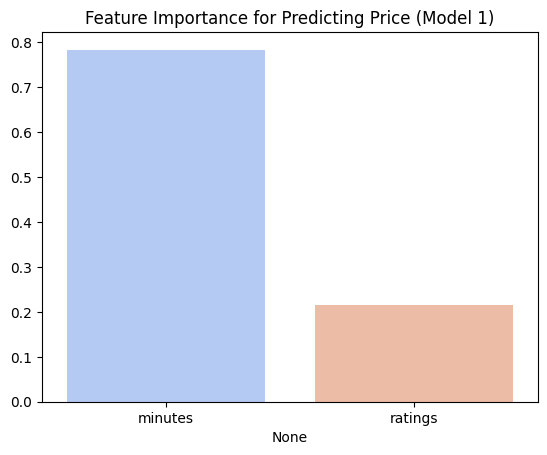

/var/folders/09/_ffptp312fj33qw8f8_zqqgc0000gn/T/ipykernel_26876/3238631432.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X2.columns, y=importance2, palette='coolwarm')


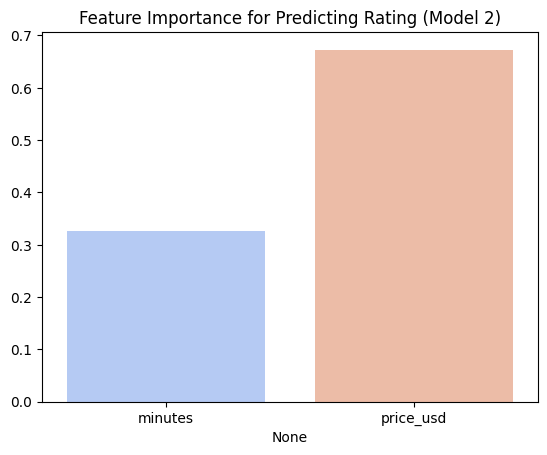

In [12]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
audible_df = pd.read_csv('audible_output.csv')

# Preprocess the dataset
# Drop rows with missing values in critical columns
audible_df = audible_df.dropna(subset=['minutes', 'ratings', 'price_usd'])

# Ensure numeric data types
audible_df['minutes'] = pd.to_numeric(audible_df['minutes'], errors='coerce')
audible_df['ratings'] = pd.to_numeric(audible_df['ratings'], errors='coerce')
audible_df['price_usd'] = pd.to_numeric(audible_df['price_usd'], errors='coerce')

# Split data for Model 1: Predict price using minutes and rating
X1 = audible_df[['minutes', 'ratings']]
y1 = audible_df['price_usd']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Split data for Model 2: Predict rating using minutes and price
X2 = audible_df[['minutes', 'price_usd']]
y2 = audible_df['ratings']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train Model 1: Random Forest Regressor
model1 = RandomForestRegressor(random_state=42)
model1.fit(X1_train, y1_train)

# Train Model 2: Gradient Boosting Regressor
model2 = GradientBoostingRegressor(random_state=42)
model2.fit(X2_train, y2_train)

# Evaluate Model 1
y1_pred = model1.predict(X1_test)
print("Model 1: Predicting Price")
print("MSE:", mean_squared_error(y1_test, y1_pred))
print("R2 Score:", r2_score(y1_test, y1_pred))

# Evaluate Model 2
y2_pred = model2.predict(X2_test)
print("Model 2: Predicting Rating")
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("R2 Score:", r2_score(y2_test, y2_pred))

# Cross-validation for Model 1
cv_scores1 = cross_val_score(model1, X1, y1, cv=5, scoring='neg_mean_squared_error')
print("Model 1 Cross-Validation MSE:", -cv_scores1.mean())

# Cross-validation for Model 2
cv_scores2 = cross_val_score(model2, X2, y2, cv=5, scoring='neg_mean_squared_error')
print("Model 2 Cross-Validation MSE:", -cv_scores2.mean())

# Visualization: Actual vs Predicted for Model 1
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, alpha=0.6, color='blue')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Model 1)")
plt.show()

# Visualization: Actual vs Predicted for Model 2
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, alpha=0.6, color='green')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating (Model 2)")
plt.show()

# Feature importance for Model 1
importance1 = model1.feature_importances_
sns.barplot(x=X1.columns, y=importance1, palette='coolwarm')
plt.title("Feature Importance for Predicting Price (Model 1)")
plt.show()

# Feature importance for Model 2
importance2 = model2.feature_importances_
sns.barplot(x=X2.columns, y=importance2, palette='coolwarm')
plt.title("Feature Importance for Predicting Rating (Model 2)")
plt.show()
